DATA CREATION

In [1]:
import pandas as pd
import numpy as np

years = list(range(2000, 2021))
countries = ['India', 'USA', 'Brazil', 'Germany', 'Nigeria']
data = []

np.random.seed(42)
for country in countries:
    for year in years:
        male_rate = np.random.uniform(60, 98)
        female_rate = male_rate - np.random.uniform(-2, 15)  # usually lower for females
        data.append([country, year, male_rate, female_rate])

df = pd.DataFrame(data, columns=['Country', 'Year', 'Male_Literacy', 'Female_Literacy'])
df.to_csv('gender_literacy_gap.csv', index=False)


## Question:

1. Which countries have shown the greatest reduction in gender literacy gap from 2000 to 2020?

2. What can you infer about the rate of change?

3. Which country still has a concerning gap in 2020?

### What to reflect on:
- How do gender disparities vary over time and region?

- Which policies might have helped reduce the gap?

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
df.head()

,Country,Year,Male_Literacy,Female_Literacy
0,India,2000,74.232525,60.070381
1,India,2001,87.815770,79.638576
2,India,2002,65.928708,65.276801
3,India,2003,62.207177,49.482183
4,India,2004,82.842370,72.805137


In [4]:
df['Gap'] = df['Male_Literacy'] - df['Female_Literacy']
df.head(3)

,Country,Year,Male_Literacy,Female_Literacy,Gap
0,India,2000,74.232525,60.070381,14.162143
1,India,2001,87.815770,79.638576,8.177194
2,India,2002,65.928708,65.276801,0.651907


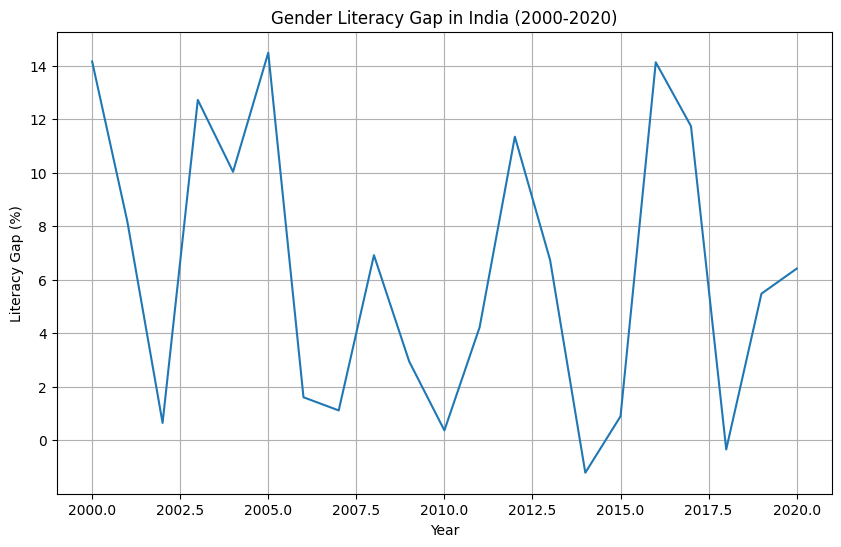

In [7]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df[df['Country'] == 'India'], x='Year', y='Gap')
plt.title('Gender Literacy Gap in India (2000-2020)')
plt.ylabel('Literacy Gap (%)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

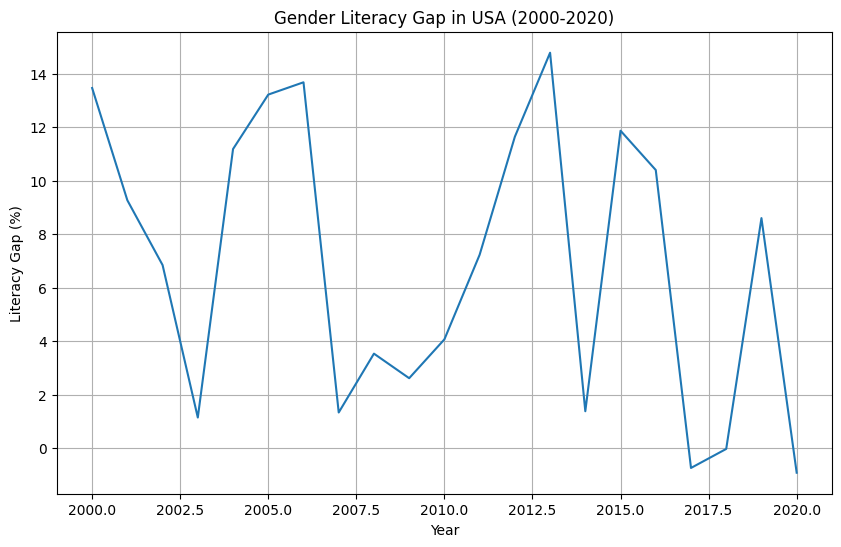

In [15]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df[df['Country'] == 'USA'], x='Year', y='Gap')
plt.title('Gender Literacy Gap in USA (2000-2020)')
plt.ylabel('Literacy Gap (%)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

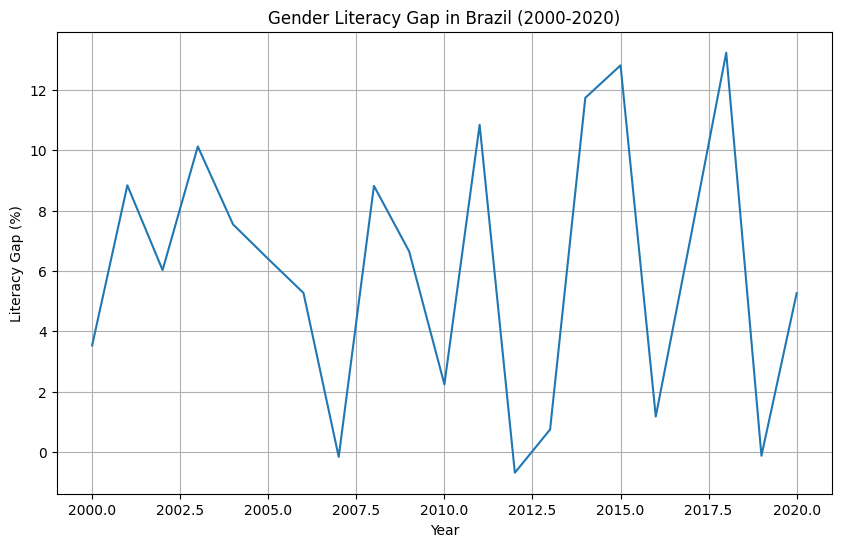

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df[df['Country'] == 'Brazil'], x='Year', y='Gap')
plt.title('Gender Literacy Gap in Brazil (2000-2020)')
plt.ylabel('Literacy Gap (%)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

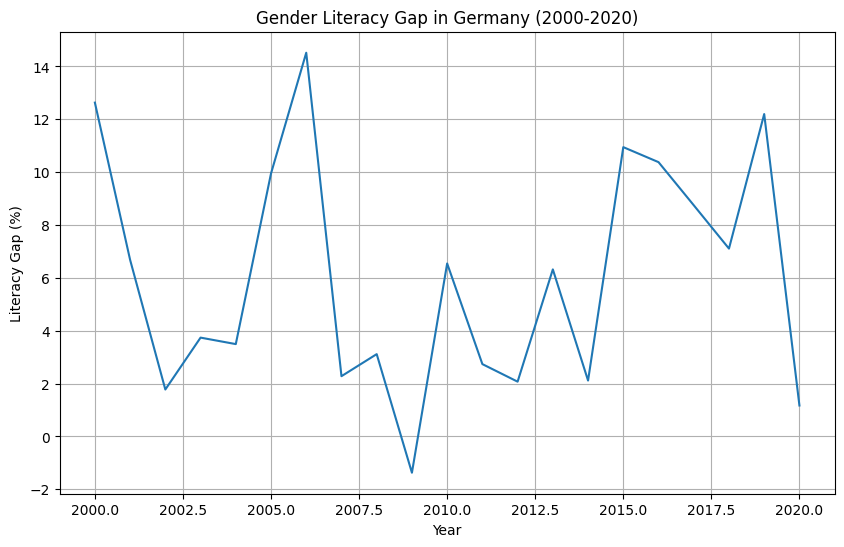

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df[df['Country'] == 'Germany'], x='Year', y='Gap')
plt.title('Gender Literacy Gap in Germany (2000-2020)')
plt.ylabel('Literacy Gap (%)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

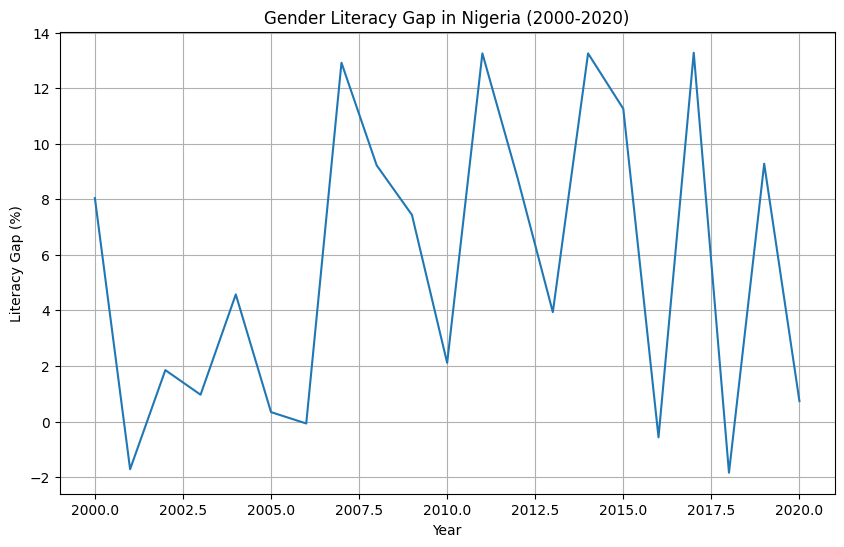

In [18]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df[df['Country'] == 'Nigeria'], x='Year', y='Gap')
plt.title('Gender Literacy Gap in Nigeria (2000-2020)')
plt.ylabel('Literacy Gap (%)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

In [13]:
df['Country'].unique()

array(['India', 'USA', 'Brazil', 'Germany', 'Nigeria'], dtype=object)

In [49]:
df[df['Year'].isin([2000,2020])]

,Country,Year,Male_Literacy,Female_Literacy,Gap
0,India,2000,74.232525,60.070381,14.162143
20,India,2020,64.637453,58.219445,6.418007
21,USA,2000,61.306764,47.848317,13.458447
41,USA,2020,72.574125,73.493633,-0.919508
42,Brazil,2000,71.817328,68.289212,3.528116
62,Brazil,2020,68.661536,63.400704,5.260832
63,Germany,2000,91.084561,78.452141,12.632420
83,Germany,2020,72.189642,71.018828,1.170815
84,Nigeria,2000,61.549455,53.504275,8.045180
104,Nigeria,2020,60.192340,59.458603,0.733737


In [ ]:
# Filter for years 2000 and 2020
df_2000_2020 = df[df['Year'].isin([2000, 2020])]

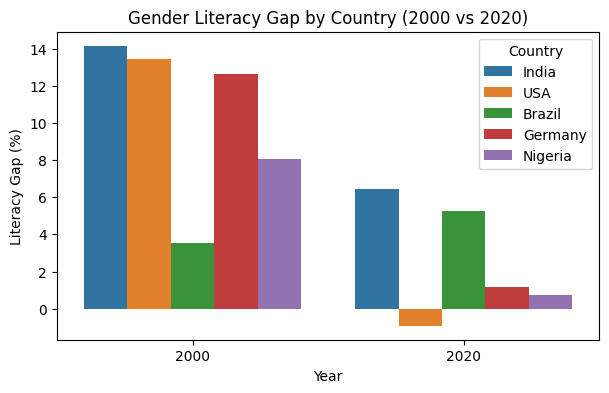

In [51]:
plt.figure(figsize=(7, 4))
sns.barplot(data=df_2000_2020, x='Year', y='Gap', hue='Country')
plt.title('Gender Literacy Gap by Country (2000 vs 2020)')
plt.ylabel('Literacy Gap (%)')
plt.xlabel('Year')
plt.show()

In [27]:
df.head()

,Country,Year,Male_Literacy,Female_Literacy,Gap
0,India,2000,74.232525,60.070381,14.162143
1,India,2001,87.815770,79.638576,8.177194
2,India,2002,65.928708,65.276801,0.651907
3,India,2003,62.207177,49.482183,12.724994
4,India,2004,82.842370,72.805137,10.037234


In [53]:
# Get final year data
final_year = df[df["Year"] == 2020]
initial_year = df[df["Year"] == 2000]

# Compute gap reduction
gap_reduction = (initial_year.set_index("Country")["Gap"] - final_year.set_index("Country")["Gap"]).sort_values(ascending=False)
gap_reduction


Country
USA        14.377955
Germany    11.461605
India       7.744136
Nigeria     7.311443
Brazil     -1.732716
Name: Gap, dtype: float64